
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

%config InlineBackend.figure_format = 'retina'


#### 데이터 로딩
1. 정제된 데이터 사용(retail.csv)

In [23]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('/content/drive/MyDrive/미니프로젝트/쇼핑몰 주문 데이터를 활용한 데이터분석 Project/Data/OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환

In [24]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int32  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float32
 6   CustomerID     397884 non-null  int32  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(1), object(4)
memory usage: 22.8+ MB


In [25]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int32         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float32       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(1), object(3)
memory usage: 22.8+ MB


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [26]:
total_r=retail['CheckoutPrice'].sum()
total_r

8911407.904

#### 국가별 매출
- 어느 나라에서 매출을 많이 올릴까

In [27]:
rev_countries=retail.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending=False)
rev_countries

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

In [28]:
rev_countries/total_r
#매출액 비율
#거의 영국에 사업이 집중 됨

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

#### 그래프 유틸 함수

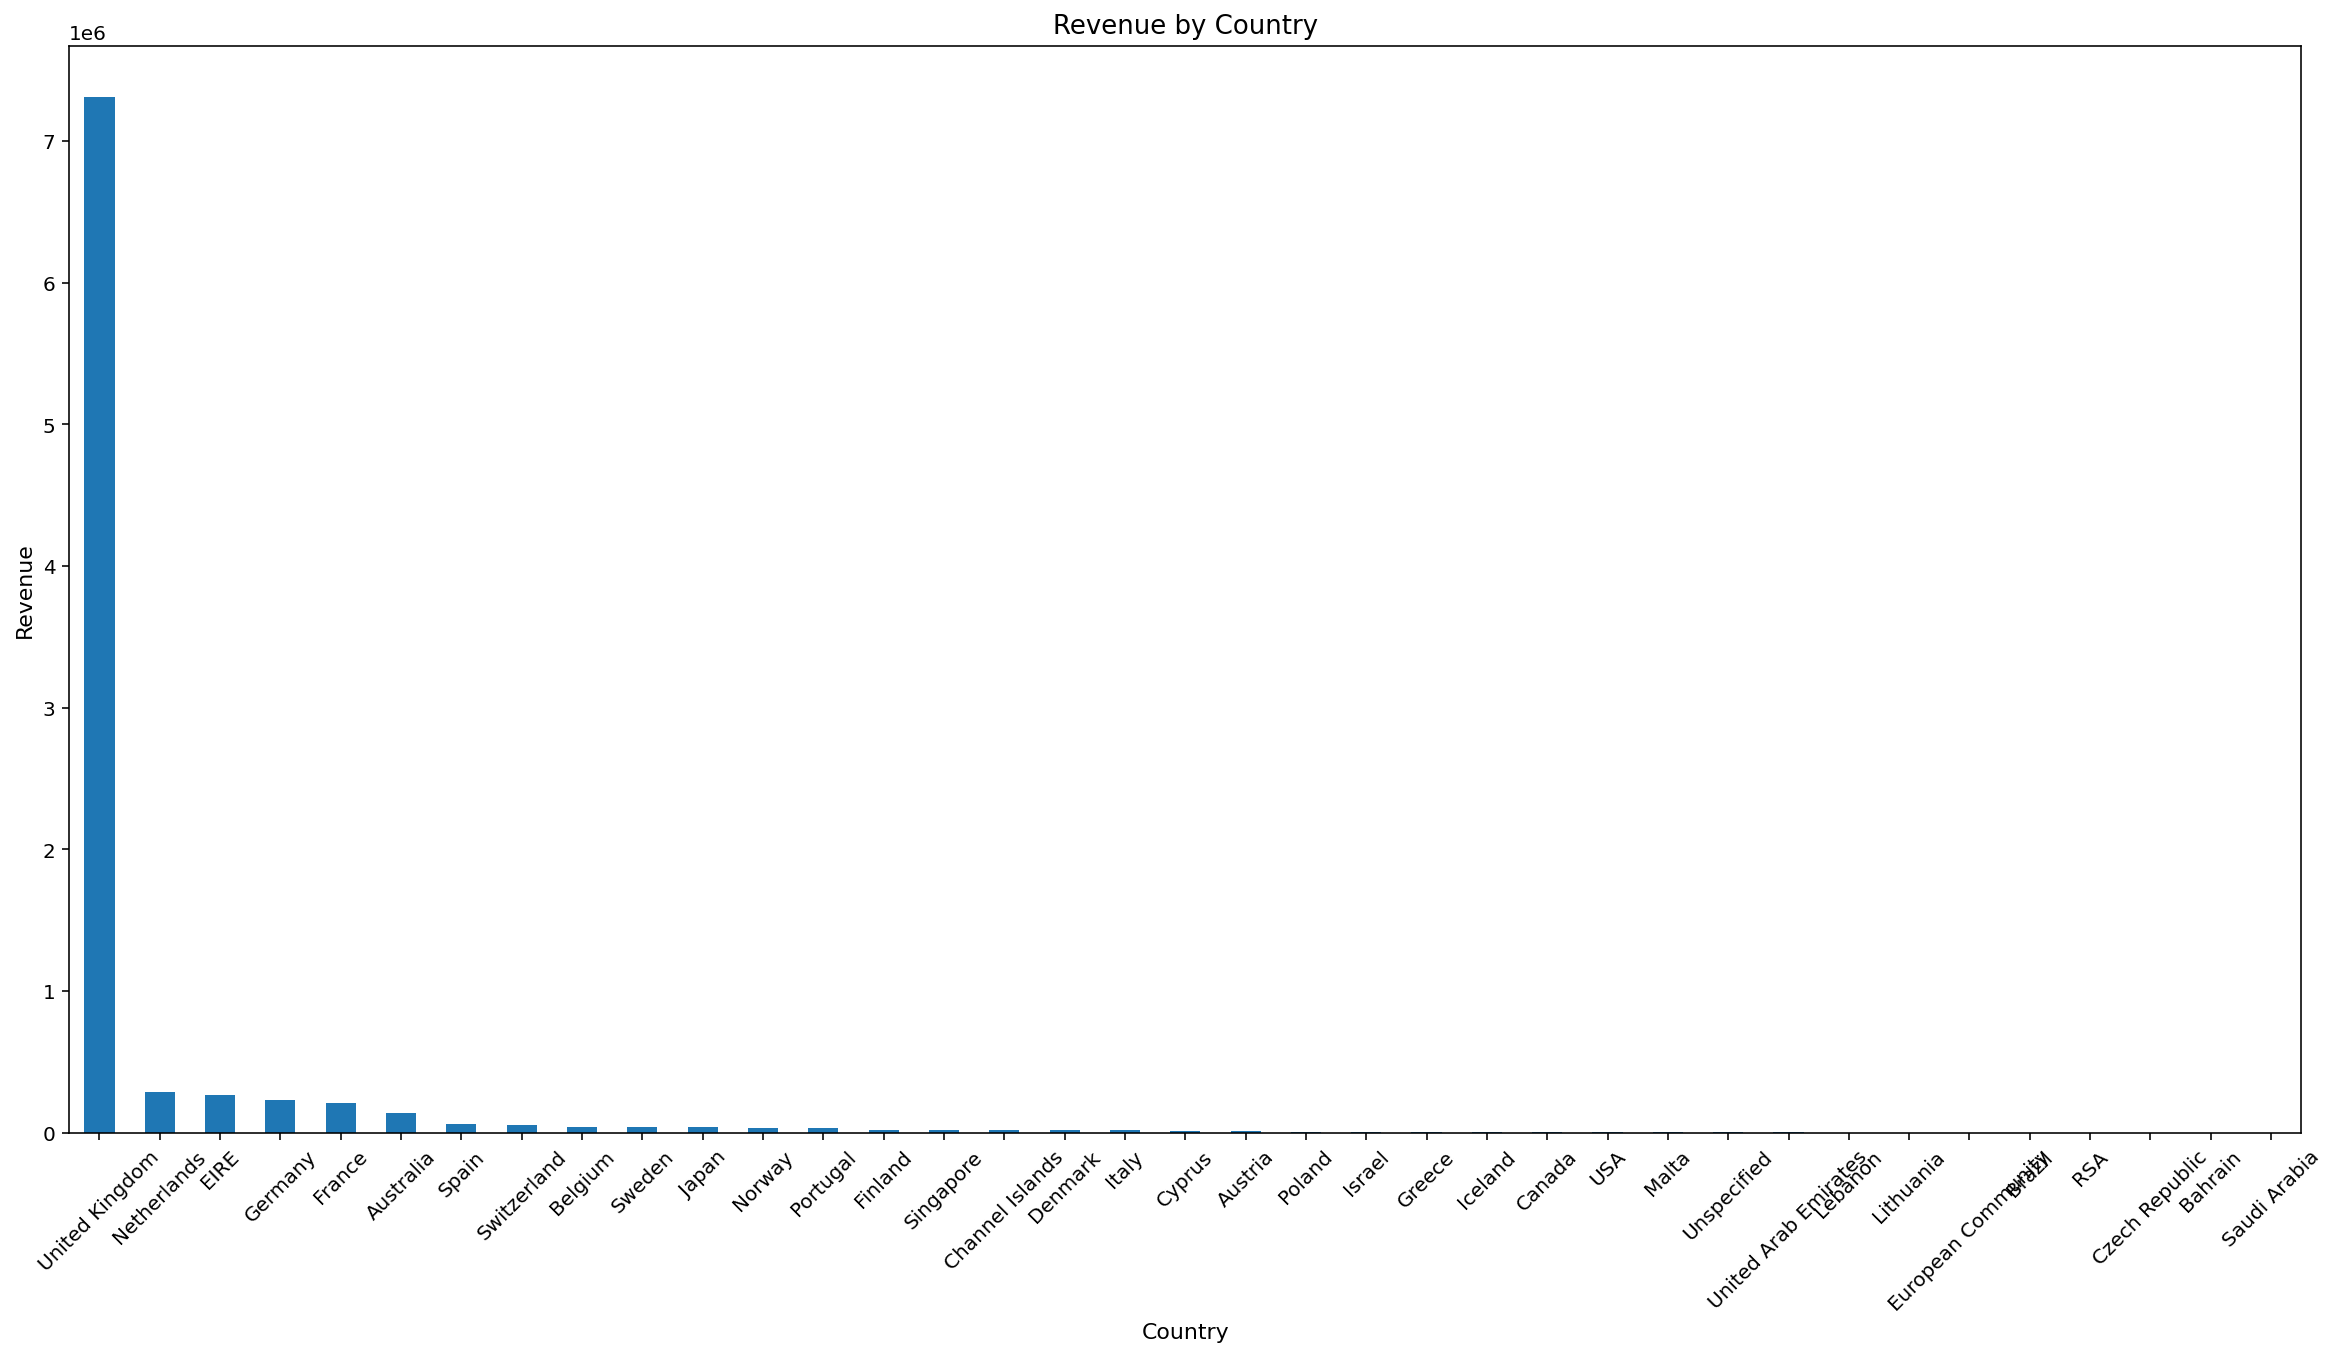

In [29]:
def plot_bar(df,xlabel,ylabel,title,color=COLORS[0],figsize=(20,10),rot=45):
  plot=df.plot(kind='bar',color=color,figsize=figsize)
  plot.set_xlabel(xlabel,fontsize=11)
  plot.set_ylabel(ylabel,fontsize=11)
  plot.set_title(title,fontsize=13)
  plot.set_xticklabels(labels=df.index,rotation=rot)

plot_bar(rev_countries,'Country','Revenue','Revenue by Country')
 #각 나라별 매출 시각화 

#### 월별 매출
- InvoiceDate에서 월만 추출

In [30]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [32]:
def extract_month(date):
  month=str(date.month)
  if date.month <10:
    month='0'+month
  return str(date.year)+month

In [33]:
rev_month=retail.set_index('InvoiceDate').groupby( extract_month).sum()['CheckoutPrice']
rev_month


201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

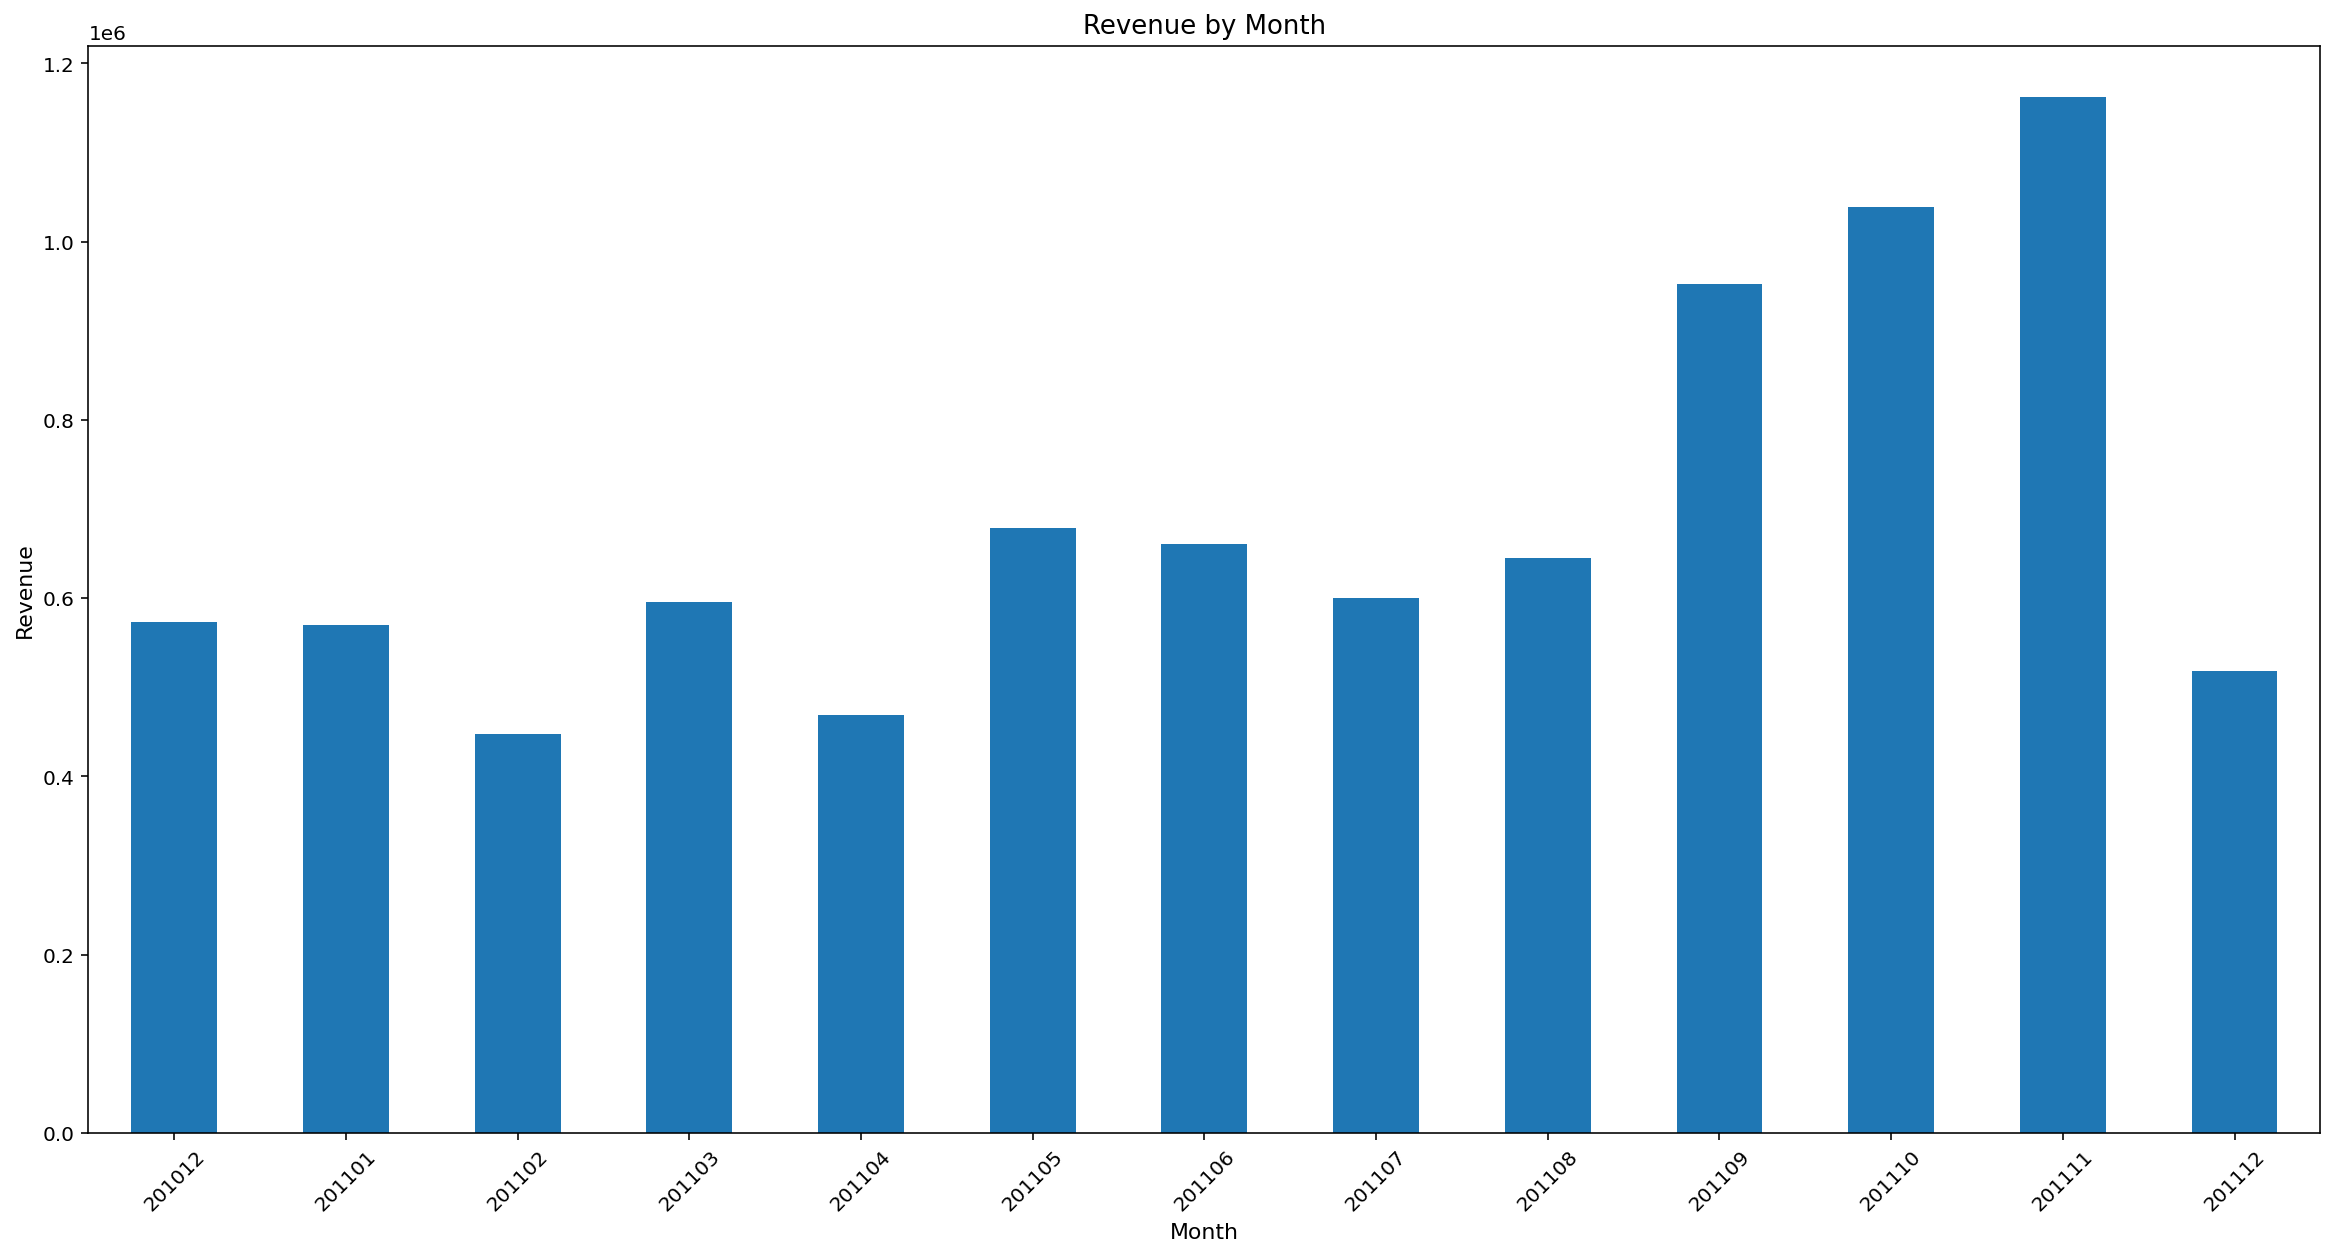

In [34]:
plot_bar(rev_month,'Month','Revenue','Revenue by Month')
#매출이 9,10,11 급격히 상승 11월에 정점


In [36]:
retail['InvoiceDate'].sort_values(ascending=False)
#12월은 9일 까지만 반영 되어있으므로 12월 매출이 낮게 반영 됨
#12월은 판단 불가

397883   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

#### 요일별 매출

In [37]:
rev_day=retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_day
#5 토요일이 비어있음 

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

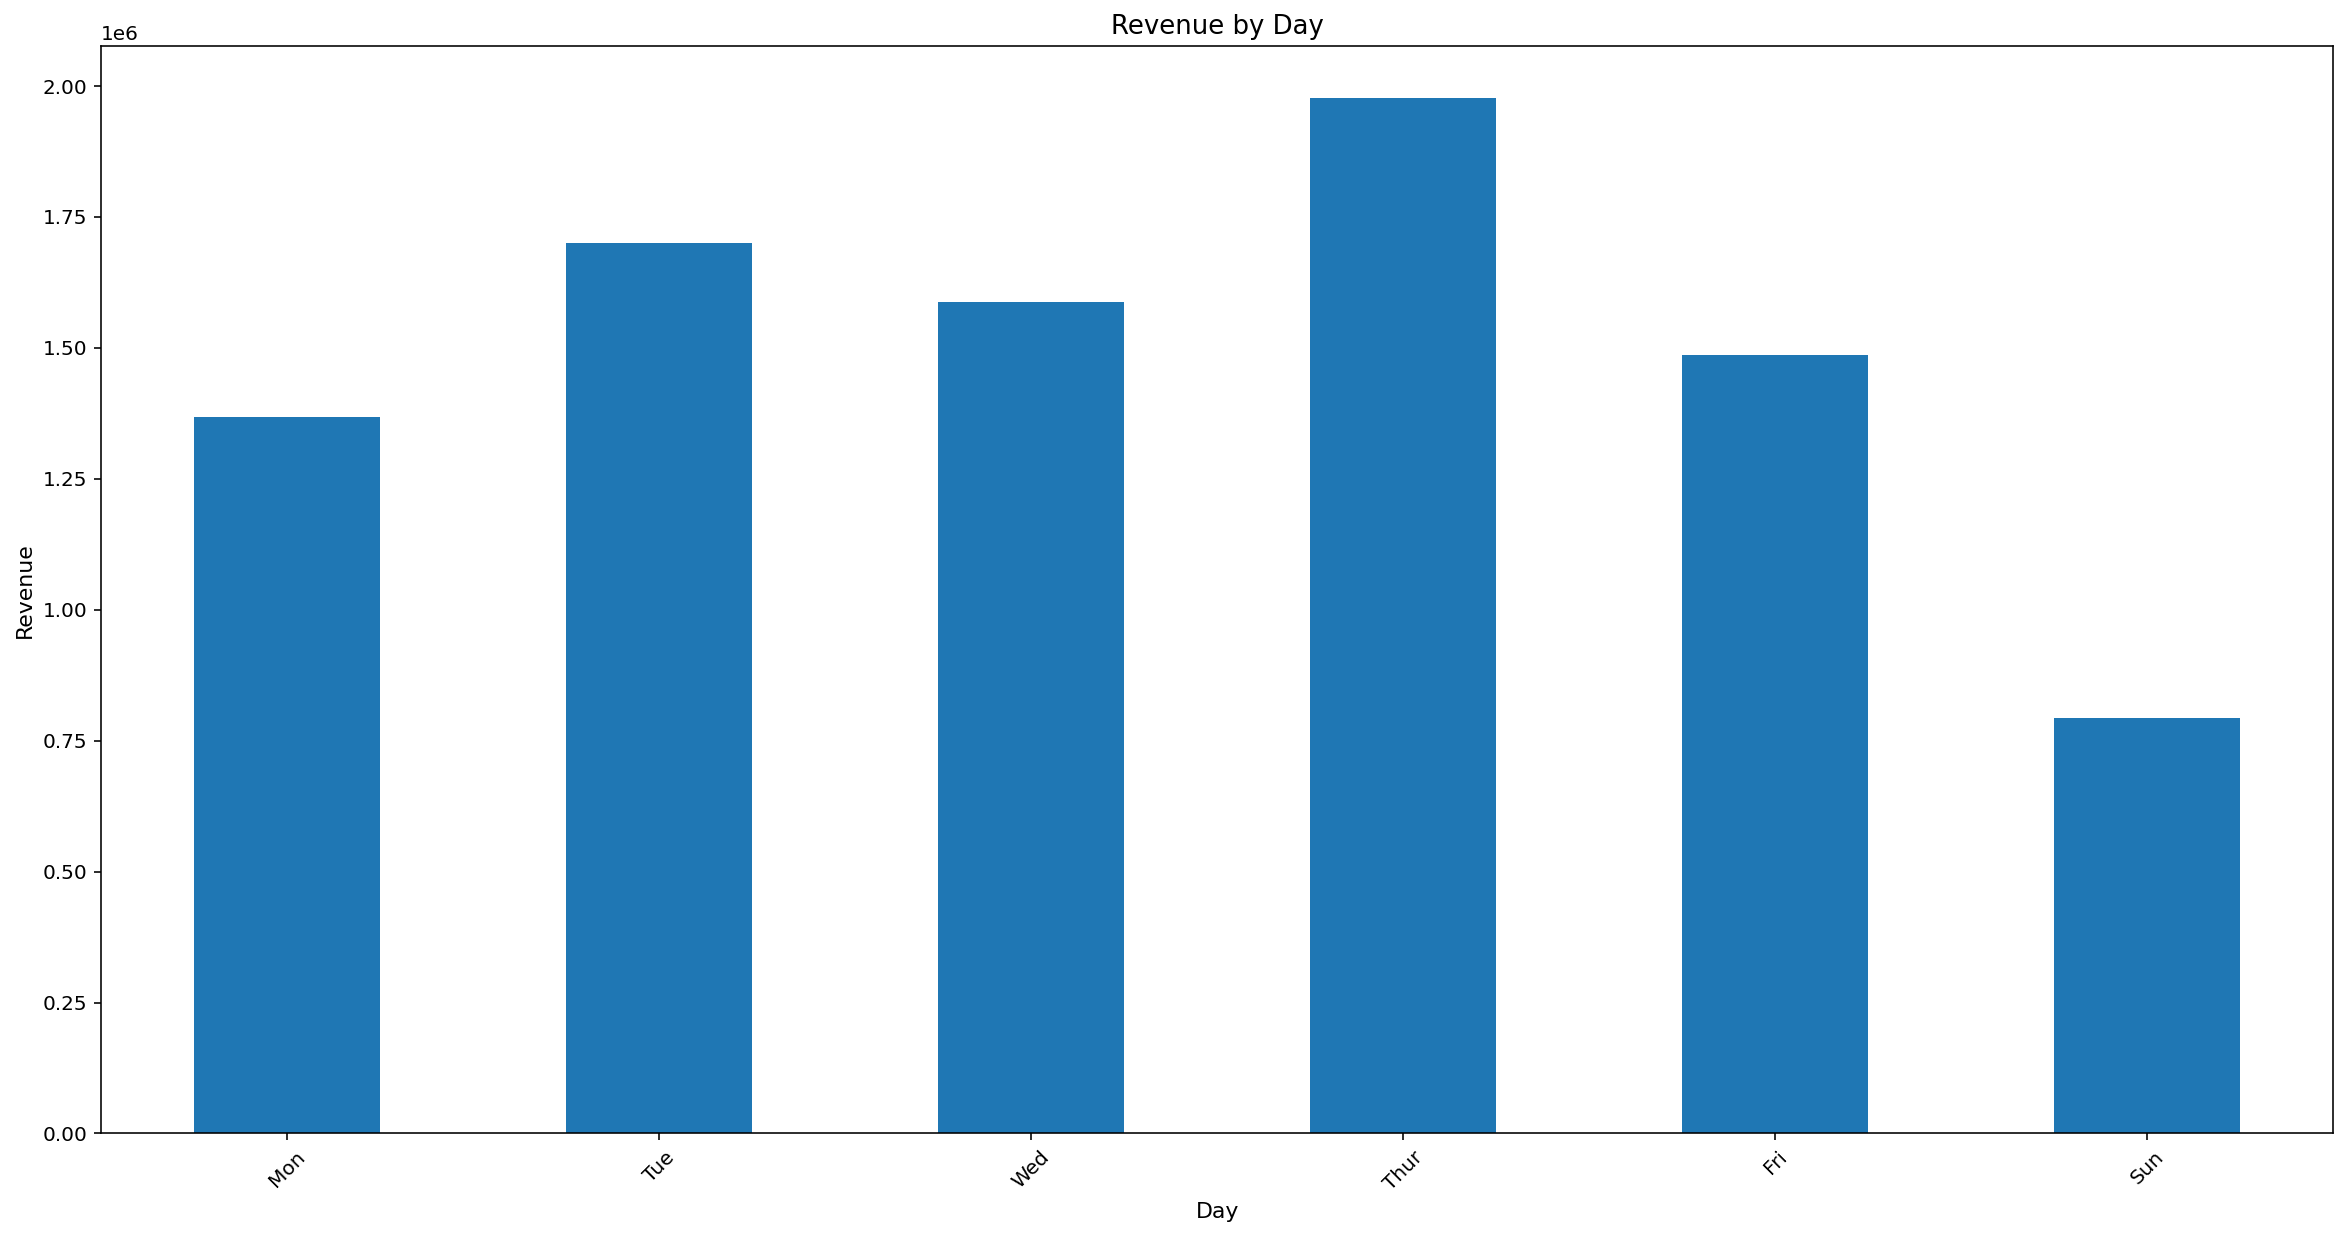

In [41]:
DAY_OF_WEEK=np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
rev_day.index=DAY_OF_WEEK[rev_day.index]
plot_bar(rev_day,'Day','Revenue','Revenue by Day')
#목요일까지 완만한 증가를 보이다가 목요일 이 후 감소 경향

#### 시간별 매출

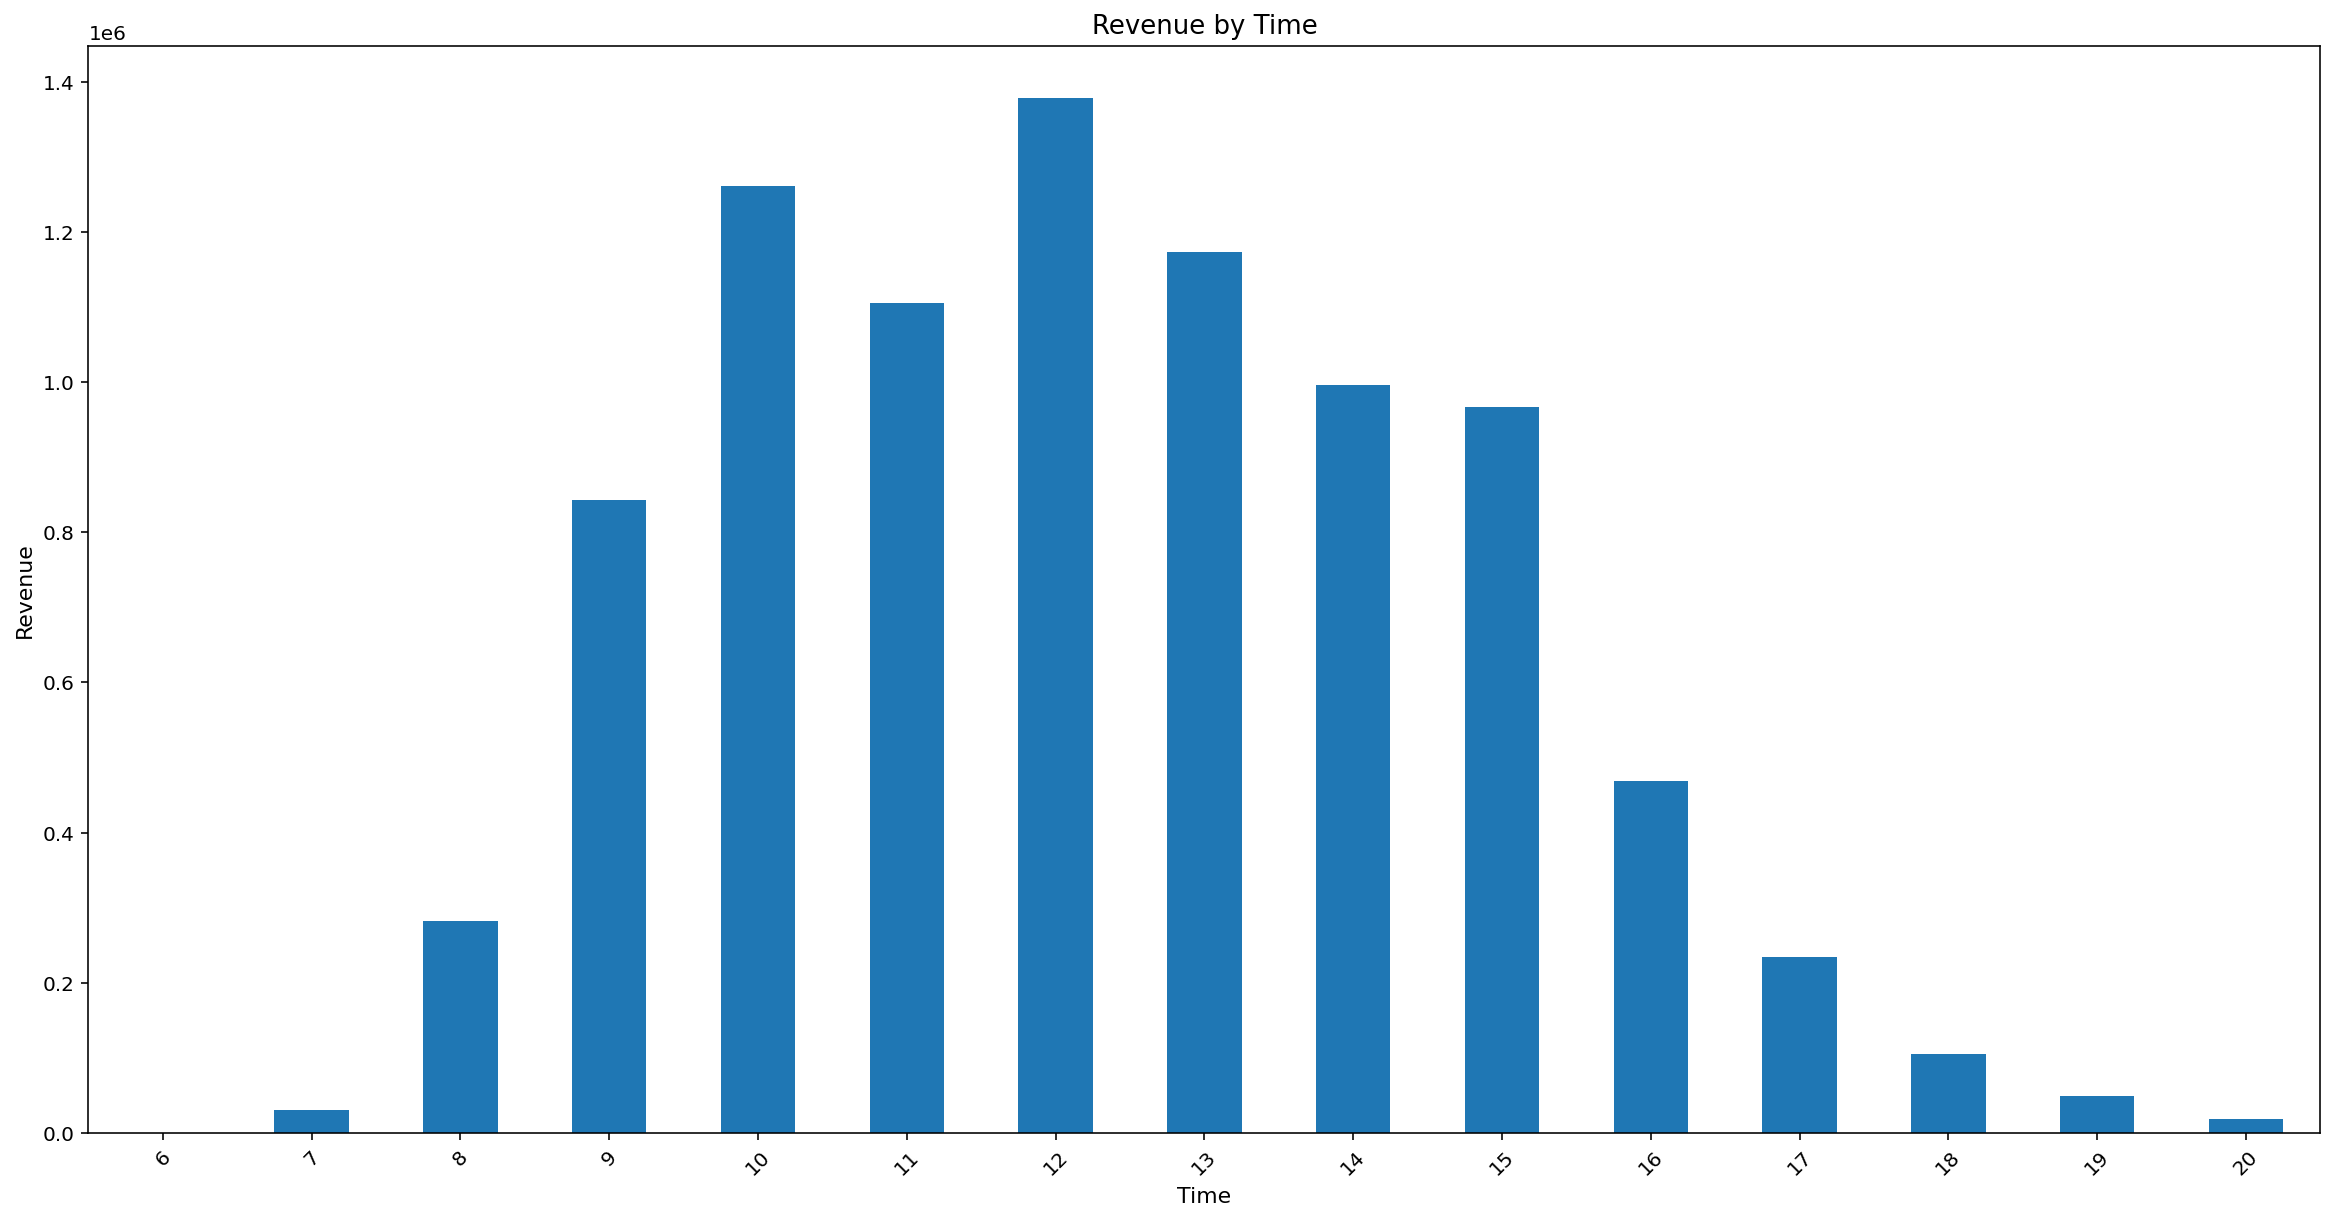

In [43]:
rev_time=retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_time,'Time','Revenue','Revenue by Time')
#3시 이 후 매출 하락

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문 없음)
   - 회사 정책인가?
   - 특이한 현상인가?
   - 데이터 유실인가?
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)

#### 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

### Top 10 판매 제품

In [45]:
top_selling=retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

### Top 10 매출 제품

In [46]:
top_rev=retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_rev
#StockCode:23843 가 가장 많이 판매되고 가장 많은 매출을 냄

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### 판매 top 3 아이템의 월별 판매량 추이

In [49]:
top_s=retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_s
#가장 많이 팔린 top3

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int32

In [52]:
top3_monthly=retail.set_index('InvoiceDate').groupby(['StockCode',extract_month]).sum()[['Quantity','CheckoutPrice']].loc[top_s.index]
top3_monthly
#23843은 2011년12월 1달의 기간 동안 만 판매하여 가장 많은 매출과 판매를 보인 아이템

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

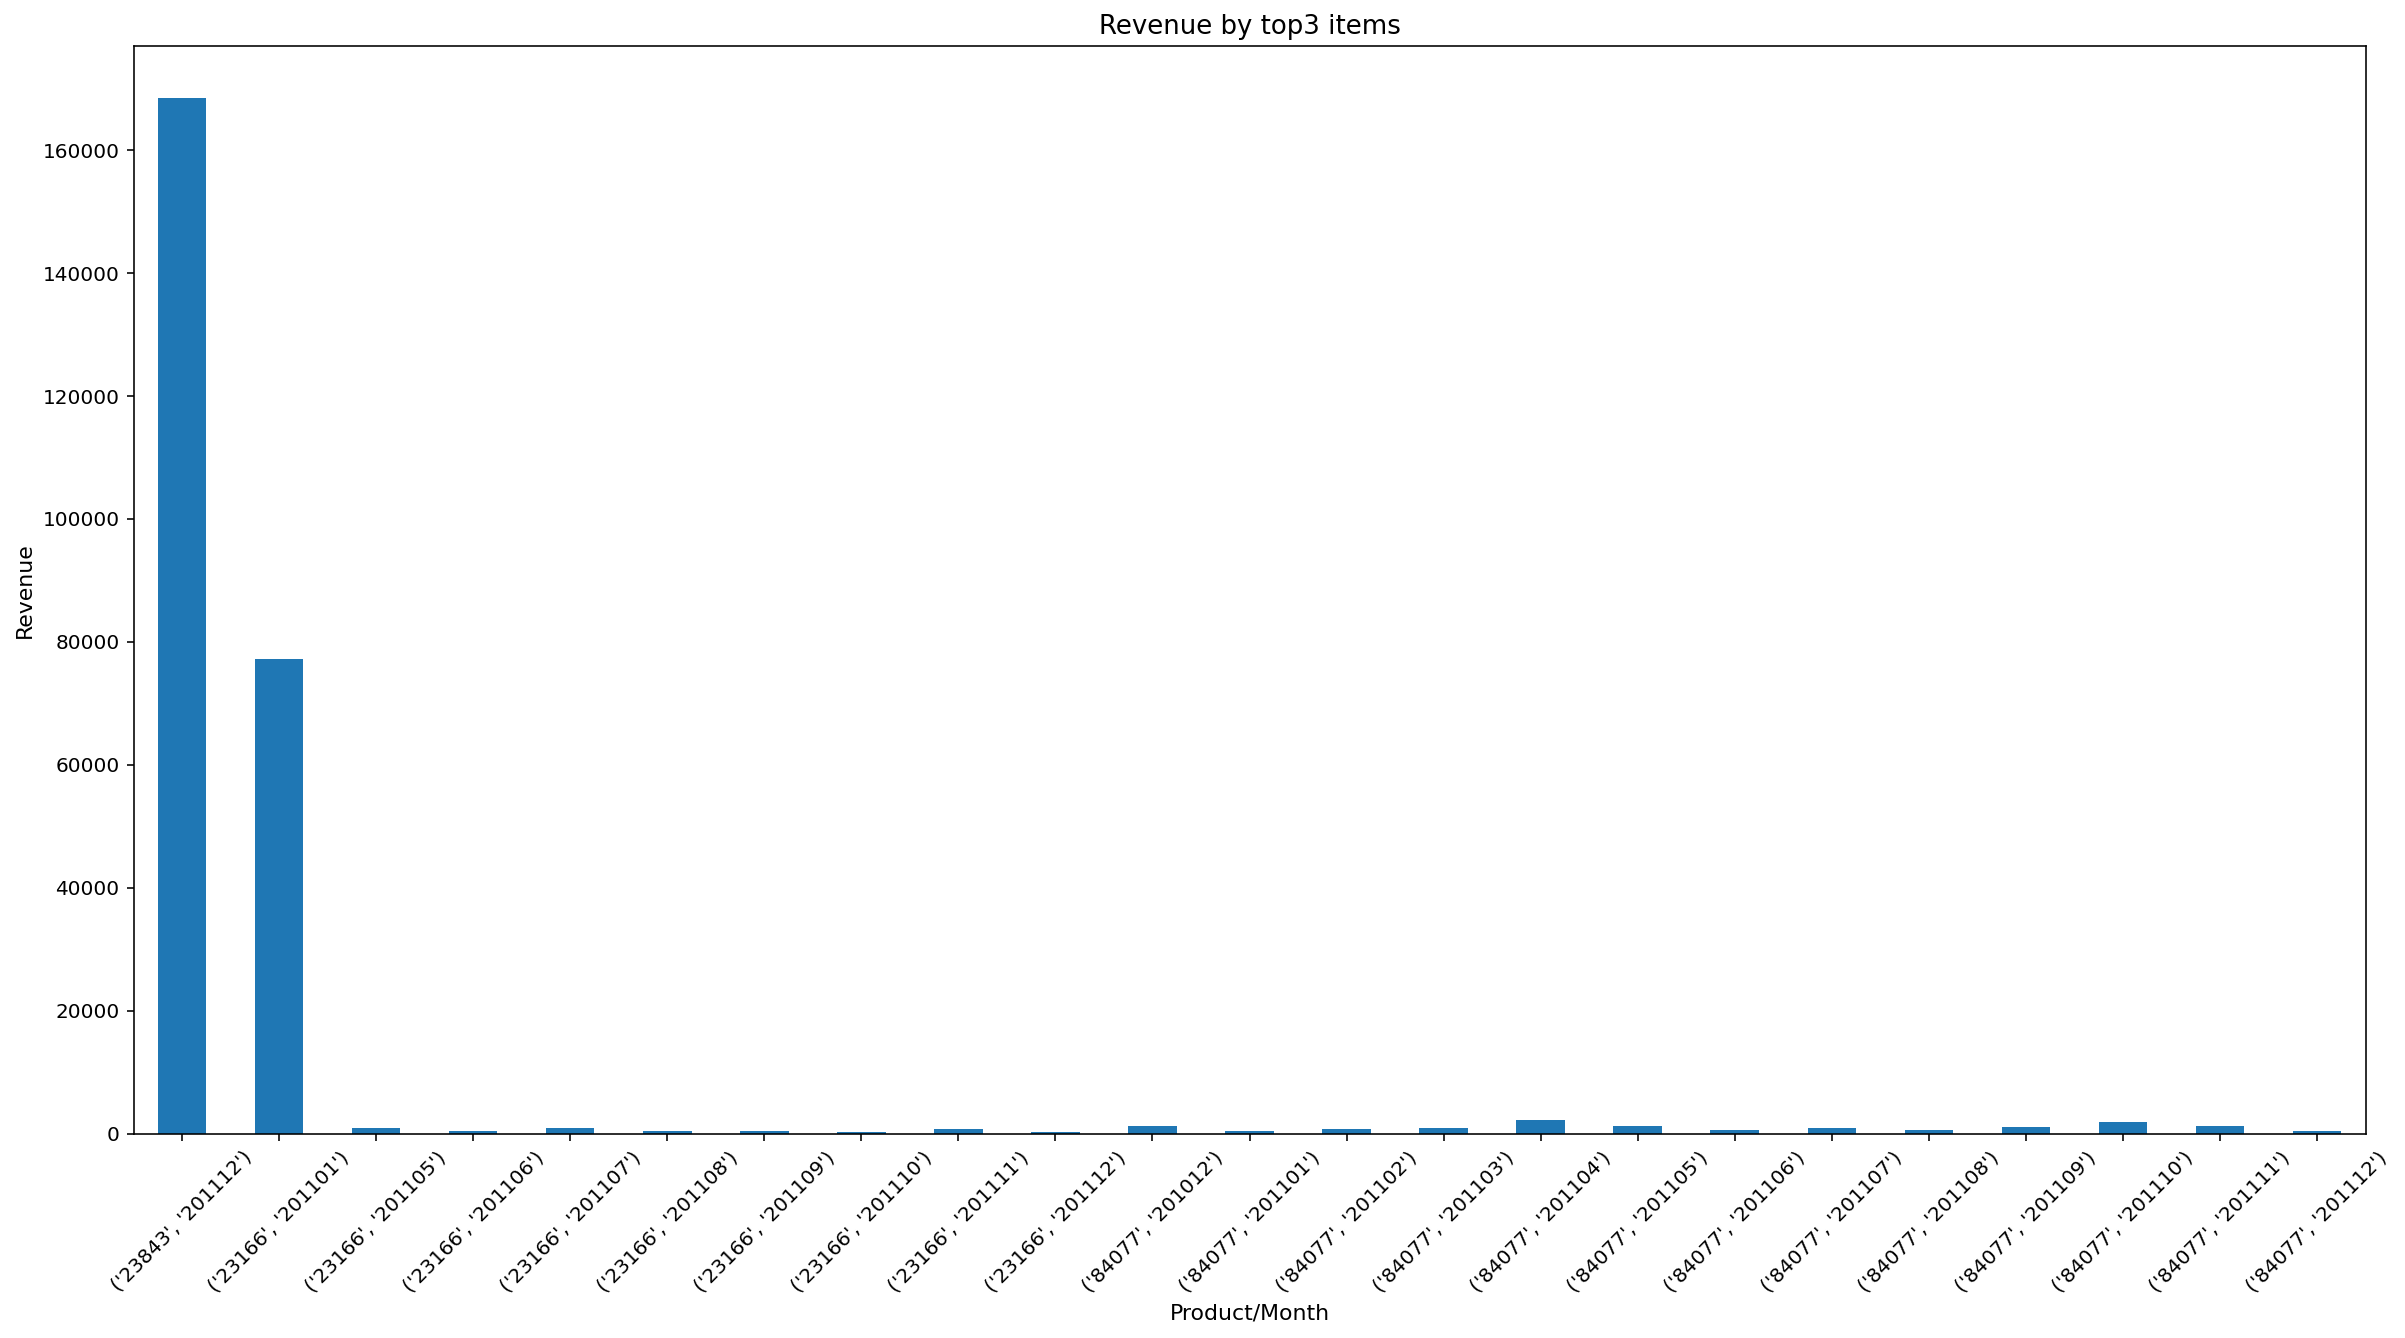

In [53]:
plot_bar(top3_monthly['CheckoutPrice'],'Product/Month','Revenue','Revenue by top3 items')
#특정달에만 집중되어 팔리는 현상이 보임
#겨울아이템인가?